In [2]:
import numpy as np
import numpy.random as rand
from scipy.stats import normaltest
import matplotlib.pyplot as plt


In [3]:
x = rand.normal(3,4,500)
z = rand.normal(1,2,500)

(array([  4.,  14.,  49., 101., 122., 111.,  75.,  20.,   3.,   1.]),
 array([-10.19078113,  -7.37999817,  -4.56921521,  -1.75843225,
          1.05235071,   3.86313367,   6.67391663,   9.48469959,
         12.29548255,  15.10626551,  17.91704847]),
 <BarContainer object of 10 artists>)

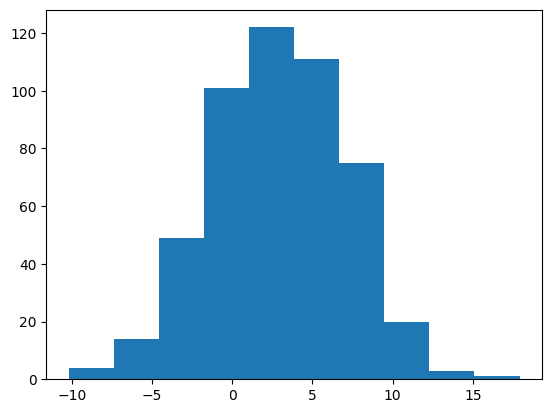

In [4]:
plt.hist(x)

In [5]:
y = 3+4*rand.uniform(0,1,size=500)
y = rand.uniform(3,7,size=500)
w = rand.uniform(2.1,5.4,size=500)


In [6]:
a = x+z
b = y+w
c = x+y

In [7]:
normaltest(x)

NormaltestResult(statistic=np.float64(0.012190095987278658), pvalue=np.float64(0.9939234891307076))

In [8]:
normaltest(y)

NormaltestResult(statistic=np.float64(335.30989337057935), pvalue=np.float64(1.5430563666569394e-73))

In [9]:
normaltest(a)

NormaltestResult(statistic=np.float64(2.029260535824884), pvalue=np.float64(0.36253644641299676))

In [10]:
normaltest(b)

NormaltestResult(statistic=np.float64(19.045264048855987), pvalue=np.float64(7.317680751494944e-05))

In [11]:
normaltest(c)

NormaltestResult(statistic=np.float64(0.5482690181717733), pvalue=np.float64(0.7602298105663879))

In [12]:
from scipy.stats import pearsonr

In [13]:
pearsonr(a,x)

PearsonRResult(statistic=np.float64(0.9002226952742259), pvalue=np.float64(6.0226193282380025e-182))

In [14]:
pearsonr(z,x)

PearsonRResult(statistic=np.float64(-0.005100949895122863), pvalue=np.float64(0.909415390402665))

In [15]:
pearsonr(a,c)

PearsonRResult(statistic=np.float64(0.869236604469441), pvalue=np.float64(1.8329683375991357e-154))

In [ ]:
# Avalie a normalisdade

# Normalidade e correlação

Avalie a normalidade dos dados e a possibilidade de correlação entre as variáveis do conjunto de dados de erupções do gêiser em:
[https://www.kaggle.com/datasets/emmanueldjegou/old-faithful-dataset/data]

Verifique se é possivel obter normalidade de alguma das variáveis separando-as por algum valor. Mostre.

In [16]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("emmanueldjegou/old-faithful-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'old-faithful-dataset' dataset.
Path to dataset files: /kaggle/input/old-faithful-dataset


In [17]:
import os

os.listdir(path)


['OldFaithful.txt']

In [18]:
import pandas as pd

df = pd.read_csv(os.path.join(path, "OldFaithful.txt"), sep="\s+")
df.head()


<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-2363431791.py:3: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(os.path.join(path, "OldFaithful.txt"), sep="\s+")


,D,Y,X
0,1,78,4.4
1,1,74,3.9
2,1,68,4.0
3,1,76,4.0
4,1,80,3.5


In [19]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   D       107 non-null    int64  
 1   Y       107 non-null    int64  
 2   X       107 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 2.6 KB


,D,Y,X
count,107.000000,107.000000,107.000000
mean,4.514019,71.000000,3.460748
std,2.275234,12.966575,1.036299
min,1.000000,42.000000,1.700000
25%,3.000000,59.000000,2.300000
50%,5.000000,75.000000,3.800000
75%,6.000000,80.500000,4.300000
max,8.000000,95.000000,4.900000


In [20]:
# Teste de normalidade


print("Normalidade X (erupções):", normaltest(df['X']))
print("Normalidade Y (waiting):", normaltest(df['Y']))


Normalidade X (erupções): NormaltestResult(statistic=np.float64(34.25516295029311), pvalue=np.float64(3.644063003147748e-08))
Normalidade Y (waiting): NormaltestResult(statistic=np.float64(12.802658867739922), pvalue=np.float64(0.0016593498103211603))


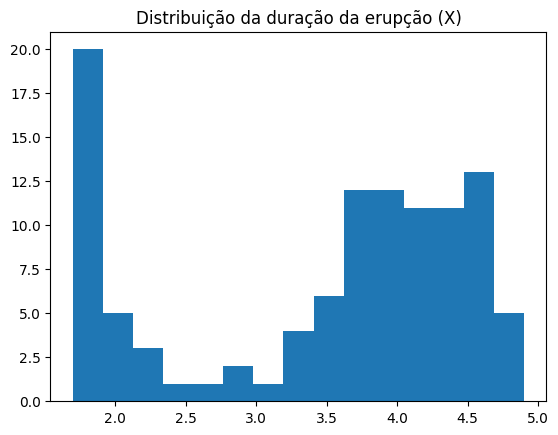

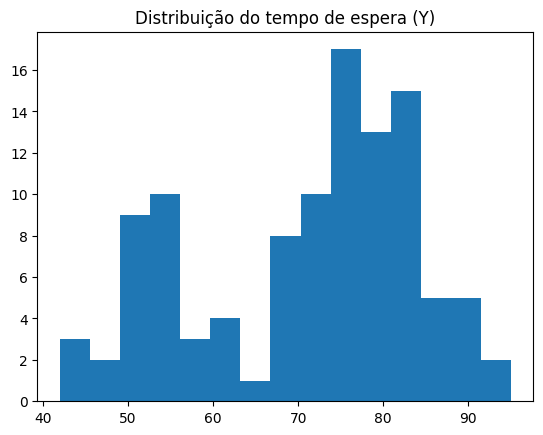

In [21]:
# Visualizar distribuições

plt.hist(df['X'], bins=15)
plt.title("Distribuição da duração da erupção (X)")
plt.show()

plt.hist(df['Y'], bins=15)
plt.title("Distribuição do tempo de espera (Y)")
plt.show()

In [22]:
# Correlação entre X e Y

print("Correlação Pearson:", pearsonr(df['X'], df['Y']))
print("Correlação Spearman:", spearmanr(df['X'], df['Y']))

Correlação Pearson: PearsonRResult(statistic=np.float64(0.8584272968859495), pvalue=np.float64(3.2489131712044824e-32))


NameError: name 'spearmanr' is not defined

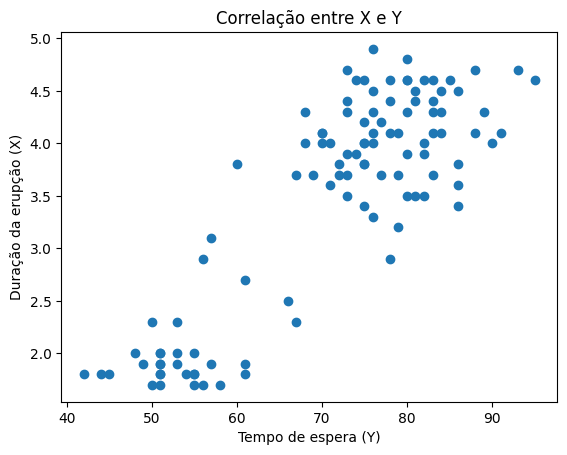

In [23]:
plt.scatter(df['Y'], df['X'])
plt.xlabel("Tempo de espera (Y)")
plt.ylabel("Duração da erupção (X)")
plt.title("Correlação entre X e Y")
plt.show()

In [24]:
# Possibilidade de normalidade ao segmentar

grupo1 = df[df['Y'] < 70]['X']
grupo2 = df[df['Y'] >= 70]['X']

print("X normalidade (Y < 70):", normaltest(grupo1))
print("X normalidade (Y >= 70):", normaltest(grupo2))

X normalidade (Y < 70): NormaltestResult(statistic=np.float64(15.03875172509779), pvalue=np.float64(0.0005424710366985974))
X normalidade (Y >= 70): NormaltestResult(statistic=np.float64(2.040215605403667), pvalue=np.float64(0.36055606915949784))


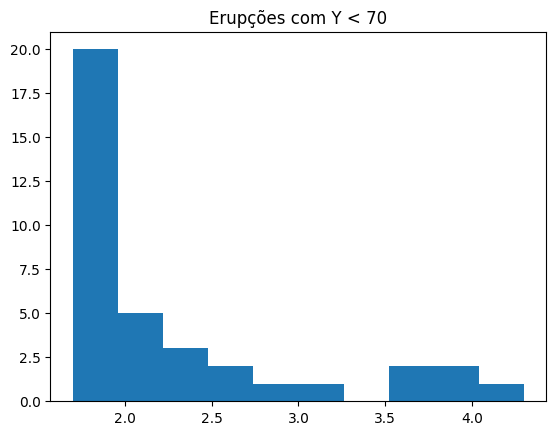

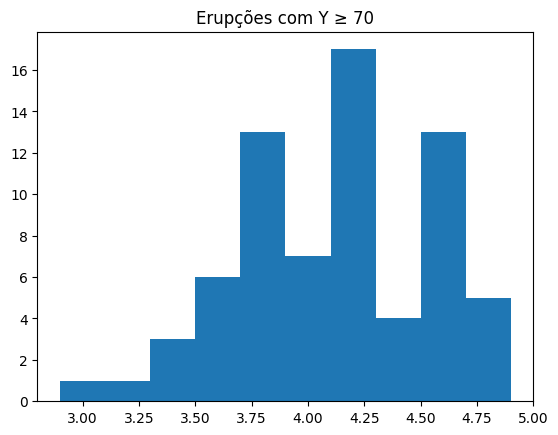

In [25]:
plt.hist(grupo1, bins=10)
plt.title("Erupções com Y < 70")
plt.show()

plt.hist(grupo2, bins=10)
plt.title("Erupções com Y ≥ 70")
plt.show()

Os dados do Old Faithful não seguem distribuição normal quando analisados em conjunto (p < 0.05), resultado consistente com a bimodalidade observada nos histogramas. Entretanto, ao segmentar a amostra pelo tempo de espera, verificou-se que o grupo com Y ≥ 70 minutos apresenta p = 0.36, não rejeitando a hipótese de normalidade. Já o grupo com Y < 70 mantém p < 0.05, indicando ausência de normalidade. Portanto, é possível obter normalidade apenas para as erupções longas, demonstrando que a falta de normalidade global decorre da mistura de duas distribuições distintas.

# Considerando um intervalo com distribuição normal na variável `X`, calcule o intervalo de confiança de 95%.


In [26]:
grupo_norm = df[df['Y'] >= 70]['X']


In [28]:
from scipy.stats import t
dados = grupo_norm

n = len(dados)
media = np.mean(dados)
desvio = np.std(dados, ddof=1)

# nível de confiança 95%
alpha = 0.05
t_crit = t.ppf(1 - alpha/2, df=n-1)

erro_padrao = desvio / np.sqrt(n)

lim_inf = media - t_crit * erro_padrao
lim_sup = media + t_crit * erro_padrao

(lim_inf, lim_sup)

(np.float64(3.99111646055474), np.float64(4.19745496801669))

Com 95% de confiança, a duração média das erupções longas do gêiser Old Faithful está entre 3.99 e 4.20 minutos.